# Buisness Understanding
- Unplanned machine failures can lead to significant operational costs, safety risks, and production delays. By leveraging sensor data to predict the health of a machine, organizations can identify potential failures in advance, allowing for timely interventions and ensuring continuous operations.

In [1]:
# importing the necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")

# Data Understanding

In [4]:
df = pd.read_csv(r"train_data.txt",sep = " ",header = None)

In [5]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,NaN,NaN
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,NaN,NaN
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,NaN,NaN
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,NaN,NaN
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,NaN,NaN


- The dataset has unrepresentative column names (numeric) and NaN values in the last two columns. Data cleaning will be done in the Data Preparation stage, but first, EDA will be performed to visualize and better understand the data.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 28 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       20631 non-null  int64  
 1   1       20631 non-null  int64  
 2   2       20631 non-null  float64
 3   3       20631 non-null  float64
 4   4       20631 non-null  float64
 5   5       20631 non-null  float64
 6   6       20631 non-null  float64
 7   7       20631 non-null  float64
 8   8       20631 non-null  float64
 9   9       20631 non-null  float64
 10  10      20631 non-null  float64
 11  11      20631 non-null  float64
 12  12      20631 non-null  float64
 13  13      20631 non-null  float64
 14  14      20631 non-null  float64
 15  15      20631 non-null  float64
 16  16      20631 non-null  float64
 17  17      20631 non-null  float64
 18  18      20631 non-null  float64
 19  19      20631 non-null  float64
 20  20      20631 non-null  float64
 21  21      20631 non-null  int64  
 22

# EDA

In [8]:
df = df.drop(columns = [26,27])
df.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [9]:
columns = [
    'engine', 'cycle', 'setting1', 'setting2', 'setting3', 'sensor1',
    'sensor2', 'sensor3', 'sensor4', 'sensor5', 'sensor6', 'sensor7',
    'sensor8', 'sensor9', 'sensor10', 'sensor11', 'sensor12', 'sensor13',
    'sensor14', 'sensor15', 'sensor16', 'sensor17', 'sensor18', 'sensor19',
    'sensor20', 'sensor21'
]

In [11]:
df.columns = columns
df.head()

,engine,cycle,setting1,setting2,setting3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor12,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


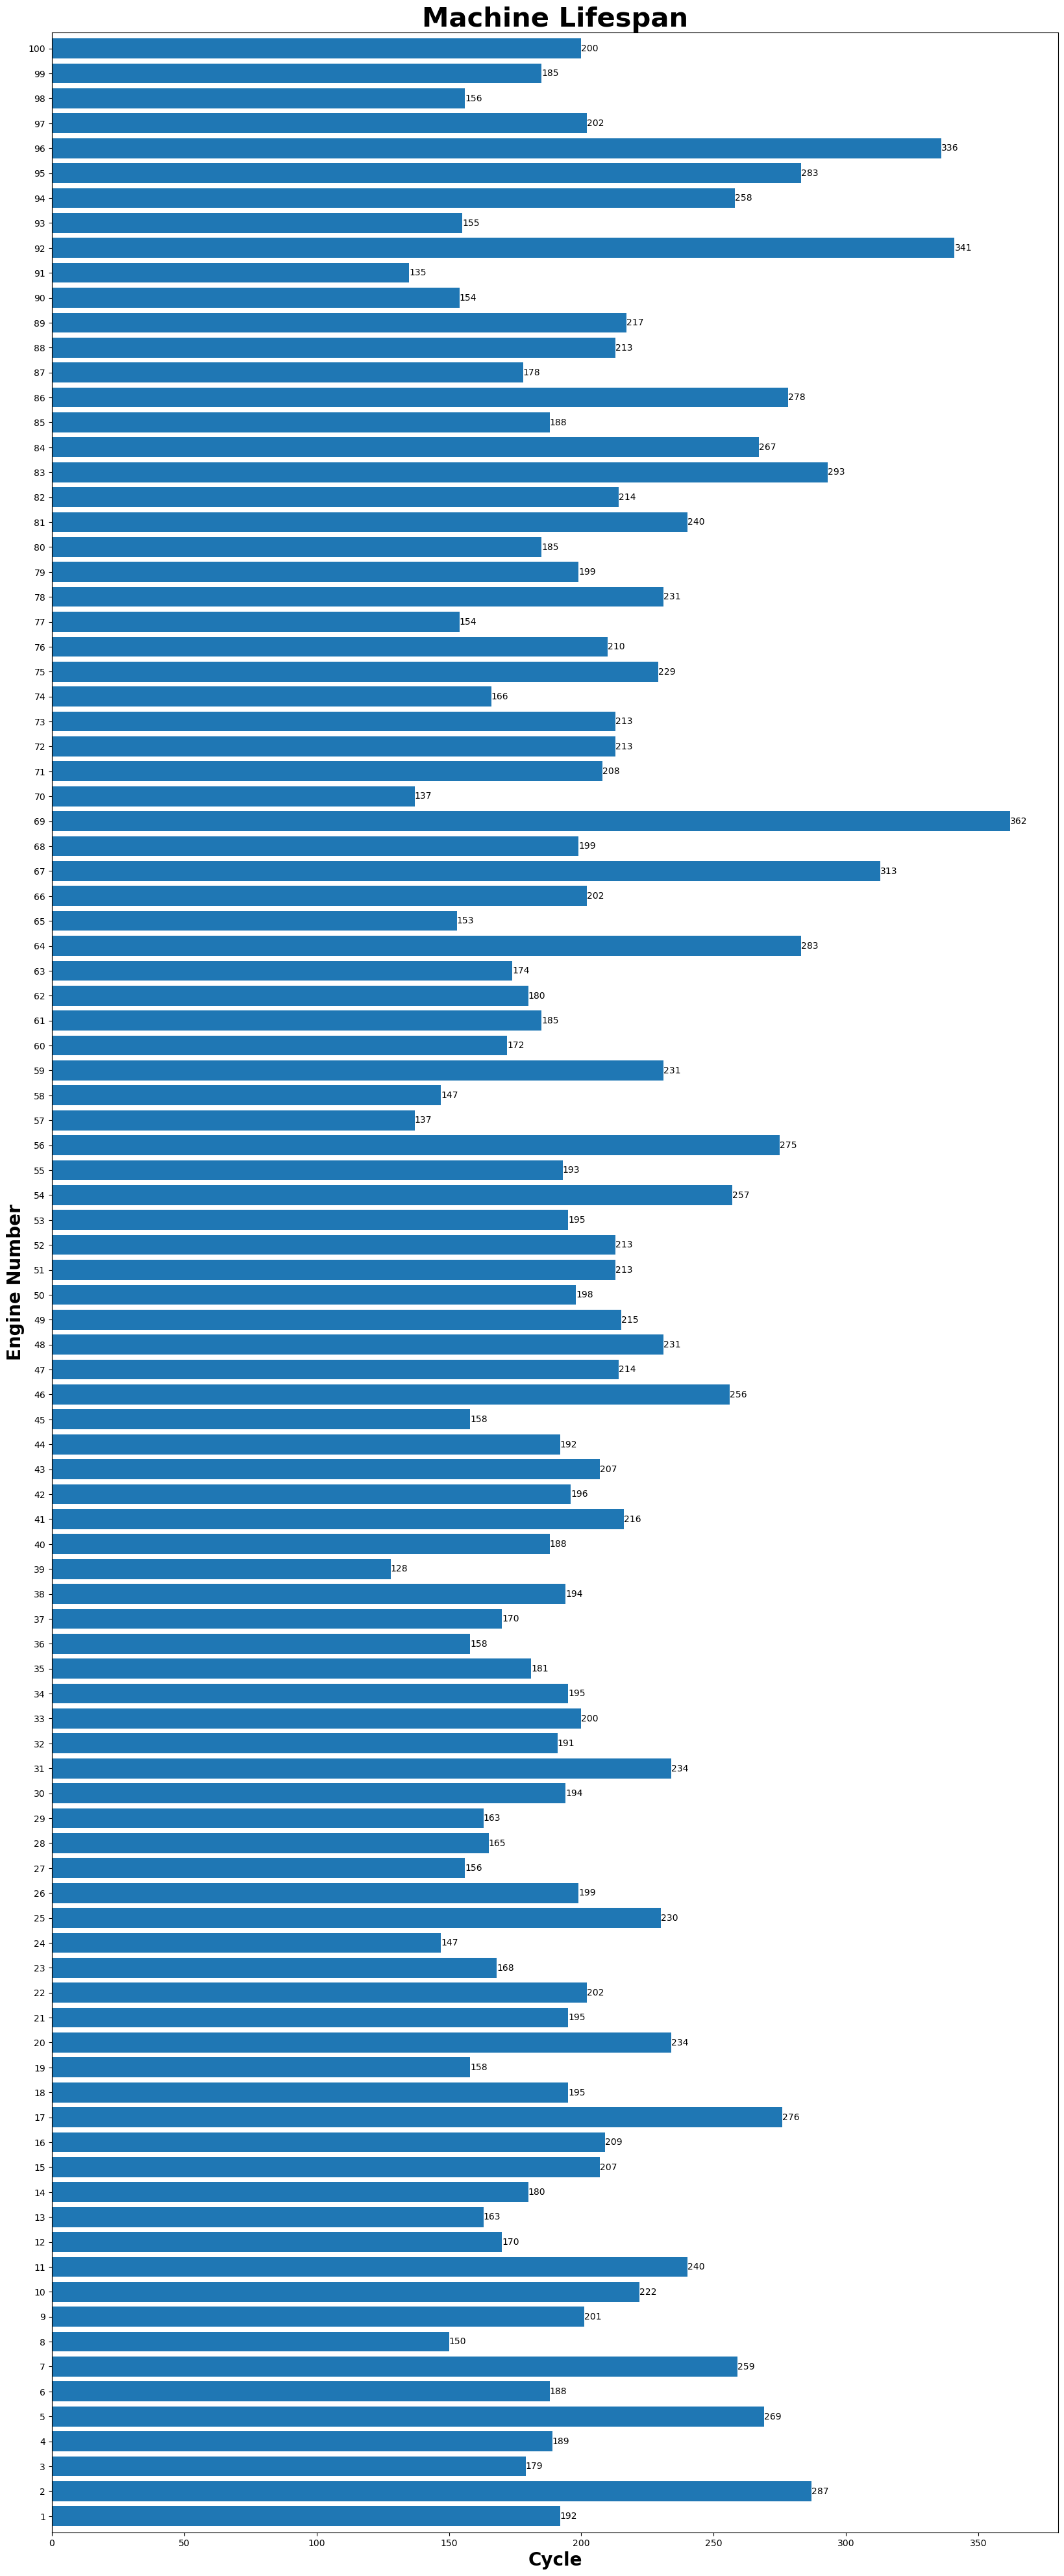

In [14]:
# Viewing the maximum cycle for each engine
max_time_cycles = df['cycle'].groupby(df['engine']).max()
plt.figure(figsize=(20, 50))

# Adding labels for each bar
ax = max_time_cycles.plot(kind='barh', width=0.8, stacked=True, align='center')
for container in ax.containers:
    for bar in container:
        width = bar.get_width()
        label = f'{width:.0f}'
        ax.text(width, bar.get_y() + bar.get_height() / 2, label,
                va='center', ha='left', fontsize=10, color='black')

# Setting title and axis labels
plt.title('Machine Lifespan', fontweight='bold', size=30)
plt.xlabel('Cycle', fontweight='bold', size=20)
plt.ylabel('Engine Number', fontweight='bold', size=20)
plt.show()


# Data Preparation

In [15]:
df.isnull().sum()

engine      0
cycle       0
setting1    0
setting2    0
setting3    0
sensor1     0
sensor2     0
sensor3     0
sensor4     0
sensor5     0
sensor6     0
sensor7     0
sensor8     0
sensor9     0
sensor10    0
sensor11    0
sensor12    0
sensor13    0
sensor14    0
sensor15    0
sensor16    0
sensor17    0
sensor18    0
sensor19    0
sensor20    0
sensor21    0
dtype: int64

In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
engine,20631.0,51.506568,2.922763e+01,1.0000,26.0000,52.0000,77.0000,100.0000
cycle,20631.0,108.807862,6.888099e+01,1.0000,52.0000,104.0000,156.0000,362.0000
setting1,20631.0,-0.000009,2.187313e-03,-0.0087,-0.0015,0.0000,0.0015,0.0087
setting2,20631.0,0.000002,2.930621e-04,-0.0006,-0.0002,0.0000,0.0003,0.0006
setting3,20631.0,100.000000,0.000000e+00,100.0000,100.0000,100.0000,100.0000,100.0000
sensor1,20631.0,518.670000,6.537152e-11,518.6700,518.6700,518.6700,518.6700,518.6700
sensor2,20631.0,642.680934,5.000533e-01,641.2100,642.3250,642.6400,643.0000,644.5300
sensor3,20631.0,1590.523119,6.131150e+00,1571.0400,1586.2600,1590.1000,1594.3800,1616.9100
sensor4,20631.0,1408.933782,9.000605e+00,1382.2500,1402.3600,1408.0400,1414.5550,1441.4900
sensor5,20631.0,14.620000,3.394700e-12,14.6200,14.6200,14.6200,14.6200,14.6200


#### insight:
- The statistical summary shows some predictors with constant values (identical min and max). These do not affect the target and should be removed to reduce computational load.

In [18]:

def drop_constant_value(dataframe):
    
    constant_column = []

    for col in dataframe.columns:
        min = dataframe[col].min()
        max = dataframe[col].max()

        if min == max:
            constant_column.append(col)

  
    dataframe.drop(columns=constant_column, inplace=True)

    return dataframe

In [19]:
df = drop_constant_value(df)
df

,engine,cycle,setting1,setting2,sensor2,sensor3,sensor4,sensor6,sensor7,sensor8,sensor9,sensor11,sensor12,sensor13,sensor14,sensor15,sensor17,sensor20,sensor21
0,1,1,-0.0007,-0.0004,641.82,1589.70,1400.60,21.61,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190
1,1,2,0.0019,-0.0003,642.15,1591.82,1403.14,21.61,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236
2,1,3,-0.0043,0.0003,642.35,1587.99,1404.20,21.61,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442
3,1,4,0.0007,0.0000,642.35,1582.79,1401.87,21.61,554.45,2388.11,9049.48,47.13,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739
4,1,5,-0.0019,-0.0002,642.37,1582.85,1406.22,21.61,554.00,2388.06,9055.15,47.28,522.19,2388.04,8133.80,8.4294,393,38.90,23.4044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,643.49,1597.98,1428.63,21.61,551.43,2388.19,9065.52,48.07,519.49,2388.26,8137.60,8.4956,397,38.49,22.9735
20627,100,197,-0.0016,-0.0005,643.54,1604.50,1433.58,21.61,550.86,2388.23,9065.11,48.04,519.68,2388.22,8136.50,8.5139,395,38.30,23.1594
20628,100,198,0.0004,0.0000,643.42,1602.46,1428.18,21.61,550.94,2388.24,9065.90,48.09,520.01,2388.24,8141.05,8.5646,398,38.44,22.9333
20629,100,199,-0.0011,0.0003,643.23,1605.26,1426.53,21.61,550.68,2388.25,9073.72,48.39,519.67,2388.23,8139.29,8.5389,395,38.29,23.0640


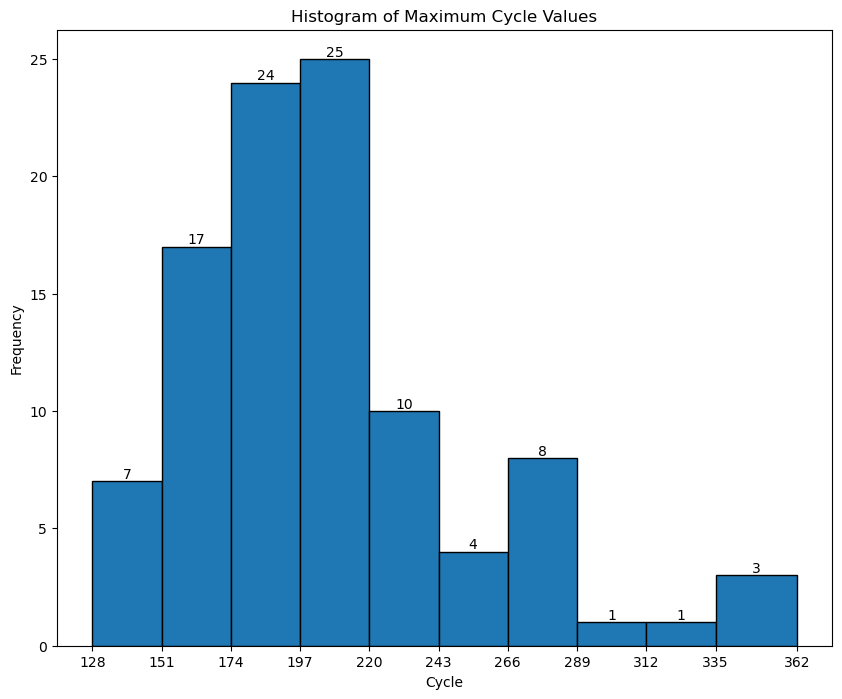

In [21]:
# Visualizing the maximum cycle values for each machine in the training data
df_max_cycle = df[['engine', 'cycle']].groupby('engine').max().reset_index()

# Setting plot size
plt.figure(figsize=(10, 8))

# Calculating bin width
bins_count = 10
max_value = df_max_cycle['cycle'].max()
min_value = df_max_cycle['cycle'].min()
bins_width = round((max_value - min_value) / bins_count)
bins_list = []

# Creating a list for bin edges
for i in range(bins_count):
    bins_list.append(min_value)
    min_value += bins_width

    if i + 1 == bins_count:
        bins_list.append(max_value)

# Determining the frequency of RUL based on bin data (bins => category division)
values, bins, bars = plt.hist(df_max_cycle['cycle'], bins=bins_list,  edgecolor='black')
plt.xticks(bins)

# Setting plot labels
plt.title("Histogram of Maximum Cycle Values")
plt.xlabel('Cycle')
plt.ylabel('Frequency')
plt.bar_label(bars)
plt.show()


#### Insight:
- The maximum cycle ranges from 128 to 362, with most machines having a maximum cycle between 128 and 220, showing a left-skewed distribution.

In [22]:
def assign_label(df, threshold):
 
    for i in range(1, 101):
        # Find the maximum cycle for each engine
        max_cycle = df.loc[(df['engine'] == i), 'cycle'].max()

        # Determine the starting cycle for assigning the label 1 (failure)
        start_warning = max_cycle - threshold

        # Assign label 1 to the dataset
        df.loc[(df['engine'] == i) & (df['cycle'] > start_warning), 'status'] = 1

    # Assign label 0 to the rest of the dataset
    df['status'].fillna(0, inplace=True)

    # Return the labeled dataset
    return df

# Define the threshold value for labeling
threshold = 20
df = assign_label(df, threshold)
df.head()


,engine,cycle,setting1,setting2,sensor2,sensor3,sensor4,sensor6,sensor7,sensor8,sensor9,sensor11,sensor12,sensor13,sensor14,sensor15,sensor17,sensor20,sensor21,status
0,1,1,-0.0007,-0.0004,641.82,1589.70,1400.60,21.61,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190,0.0
1,1,2,0.0019,-0.0003,642.15,1591.82,1403.14,21.61,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236,0.0
2,1,3,-0.0043,0.0003,642.35,1587.99,1404.20,21.61,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442,0.0
3,1,4,0.0007,0.0000,642.35,1582.79,1401.87,21.61,554.45,2388.11,9049.48,47.13,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739,0.0
4,1,5,-0.0019,-0.0002,642.37,1582.85,1406.22,21.61,554.00,2388.06,9055.15,47.28,522.19,2388.04,8133.80,8.4294,393,38.90,23.4044,0.0


#### Insight
A threshold of 20 cycles was used to label machines as "failure" when they reach 
max cycle
−
20
max cycle−20. For example, if the max cycle is 120, cycles 101–120 are labeled as failure. This helps prevent full machine failure by allowing early maintenance and replacement.

#### Reason for Labels & Threshold Selection
Classification is used instead of clustering because the goal is to predict failure with early warnings, not just identify failed machines.
A threshold of 20 provides a 20-cycle early warning before failure, allowing users to plan maintenance or replacement. This threshold is adjustable based on user needs.

0:  18631  data
1:  2000  data


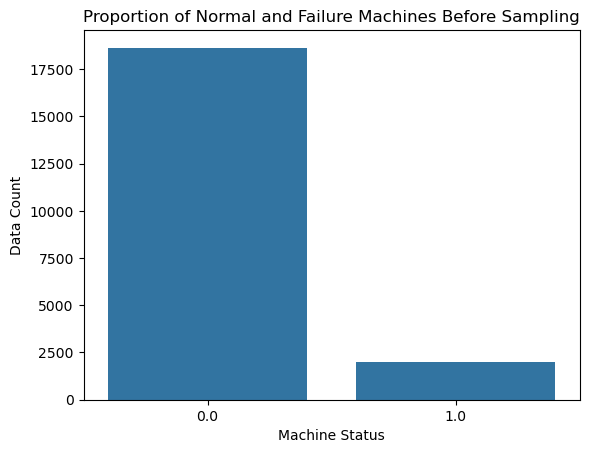

In [23]:
# Check the proportion between normal (0) and failure (1) machines
sns.countplot(x='status', data=df)
plt.title("Proportion of Normal and Failure Machines Before Sampling")
plt.xlabel('Machine Status')
plt.ylabel('Data Count')

print("0: ", len(df[df['status'] == 0]), " data")
print("1: ", len(df[df['status'] == 1]), " data")


# Insight

The bar plot shows 18,631 normal cycles and 2,000 failure cycles, with the minority class (failure) at 9.7%. This is considered moderate, so sampling should be applied to balance the dataset.

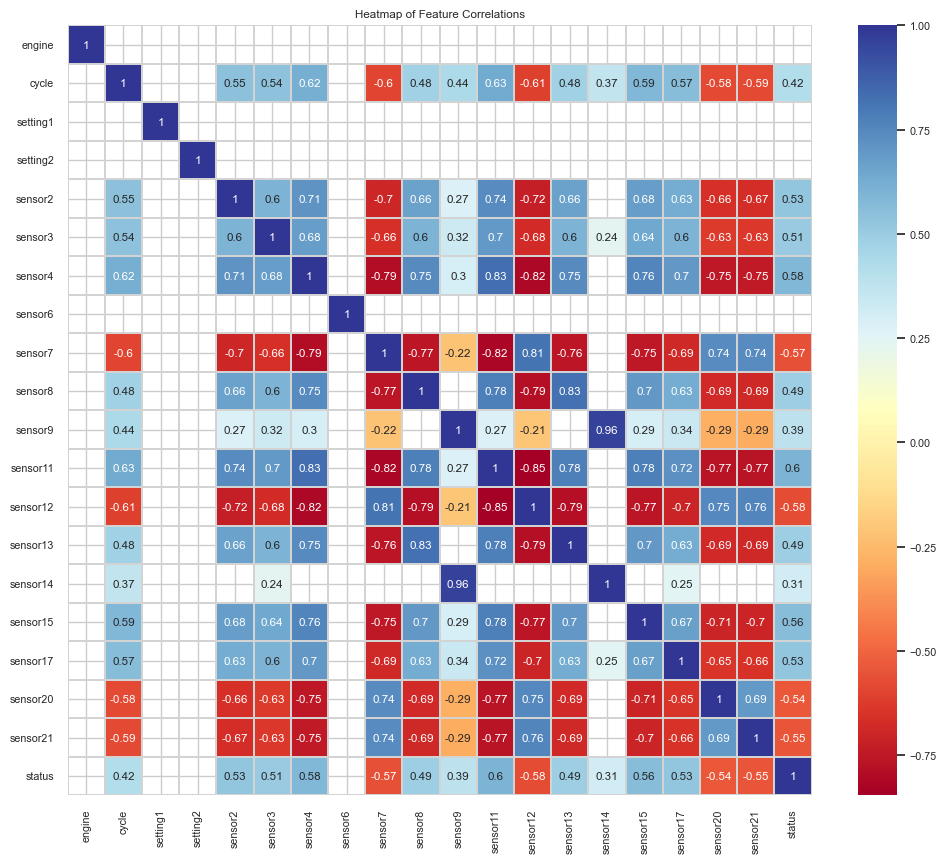

In [24]:
# Feature Selection: Correlation Heatmap with threshold
threshold = 0.2
plt.figure(figsize=(12, 10))
sns.set(font_scale=0.7)
sns.set_style("whitegrid", {"axes.facecolor": ".0"})

# Calculate correlation matrix
cluster = df.corr()

# Mask correlations below the threshold
mask = cluster.where((abs(cluster) >= threshold)).isna()

# Plot heatmap
plot_kws = {"s": 1}
sns.heatmap(cluster,
            cmap='RdYlBu',
            annot=True,
            mask=mask,
            linewidths=0.2,
            linecolor='lightgrey').set_facecolor('white')

# Add title
plt.title("Heatmap of Feature Correlations")
plt.show()


#### Insight
The heatmap shows predictors with a correlation of 0.2 or higher. A threshold of 0.2 is used because correlations below this are too weak to be useful. Negative correlations, like between sensor 2 and sensor 7 (-0.7), indicate inverse relationships—when one increases, the other decreases. Correlation values range from 0 (no correlation) to 1 (strong correlation).

In [25]:
# Display features with correlation to the target >= threshold
correlation = df.corr()
relevant_features = correlation[abs(correlation['status']) >= threshold]
relevant_features['status']


cycle       0.418602
sensor2     0.526491
sensor3     0.508912
sensor4     0.582934
sensor7    -0.565367
sensor8     0.494334
sensor9     0.385557
sensor11    0.600408
sensor12   -0.577070
sensor13    0.491833
sensor14    0.313872
sensor15    0.561315
sensor17    0.525363
sensor20   -0.540980
sensor21   -0.547923
status      1.000000
Name: status, dtype: float64

In [27]:
# Get the relevant features (correlation >= threshold)
list_relevant_features = list(relevant_features.index[1:])

# Retain relevant features and remove the rest
df = df[list_relevant_features]
df.head()


,sensor2,sensor3,sensor4,sensor7,sensor8,sensor9,sensor11,sensor12,sensor13,sensor14,sensor15,sensor17,sensor20,sensor21,status
0,641.82,1589.70,1400.60,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190,0.0
1,642.15,1591.82,1403.14,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236,0.0
2,642.35,1587.99,1404.20,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442,0.0
3,642.35,1582.79,1401.87,554.45,2388.11,9049.48,47.13,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739,0.0
4,642.37,1582.85,1406.22,554.00,2388.06,9055.15,47.28,522.19,2388.04,8133.80,8.4294,393,38.90,23.4044,0.0


In [28]:
from sklearn.model_selection import train_test_split

# Split dataset into predictors (X) and target (y)
X = df.iloc[:, :-1]  # All columns except the last one (predictors)
y = df['status']  # Directly use the 'status' column as the target

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)



In [30]:
print("Shape of train : ", X_train.shape)
print("Shape of test  : ", X_test.shape)

Shape of train :  (16504, 14)
Shape of test  :  (4127, 14)


In [31]:
# Print the counts of "normal" and "failure" cycles in the y_test dataset
print("Normal cycle (actual)  : ", y_test.value_counts()[0])
print("Failure cycle (actual) : ", y_test.value_counts()[1])


Normal cycle (actual)  :  3770
Failure cycle (actual) :  357


0:  14861  data
1:  14861  data


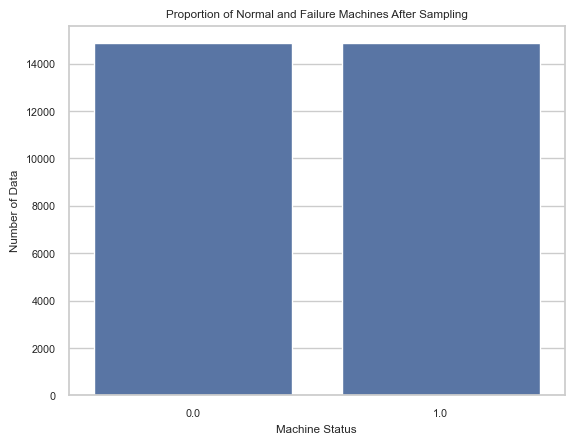

In [32]:
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

# Process oversampling to handle the imbalanced dataset
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Print the count of normal (0) and failure (1) cycles after resampling
print("0: ", len(y_train[y_train == 0]), " data")  # Normal cycles
print("1: ", len(y_train[y_train == 1]), " data")  # Failure cycles

# Check the proportion of normal (0) and failure (1) cycles after sampling
# Add the 'status' column to X_train for plotting
X_train['status'] = y_train

# Plot the distribution of normal vs failure cycles
plt.rcParams['axes.facecolor'] = 'white'
sns.countplot(x='status', data=X_train)
plt.title("Proportion of Normal and Failure Machines After Sampling")
plt.xlabel('Machine Status')
plt.ylabel('Number of Data')
plt.show()


In [33]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
from joblib import dump

# Convert X_train back into a DataFrame
X_train = pd.DataFrame(X_train, columns=X.columns)

# Scaling the features for uniform scale across features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Save the scaler for future predictions on unseen data
dump(scaler, 'scaler.bin', compress=True)

# Convert the scaled X_train back into a DataFrame
X_train_scaling = pd.DataFrame(X_train, columns=X.columns)

# Display the scaled data (X_train)
X_train_scaling.head()


,sensor2,sensor3,sensor4,sensor7,sensor8,sensor9,sensor11,sensor12,sensor13,sensor14,sensor15,sensor17,sensor20,sensor21
0,-0.938390,-0.556666,-0.909093,0.212688,0.177875,-0.622271,-1.015749,0.792598,-0.397959,-0.579051,-0.892908,-0.094989,0.888048,0.960463
1,-1.392110,-0.144523,-1.030363,1.533963,-1.576763,0.055578,-1.046601,2.175096,-1.319749,0.095758,-2.040381,-2.481010,0.746002,0.934275
2,-1.095447,-2.171478,-1.281174,0.592911,-1.459787,-0.782529,-1.817908,1.107313,-0.397959,-0.414380,-1.480251,-0.691494,1.456235,0.495435
3,-0.467220,-1.711510,-1.025770,1.524457,-1.342811,-0.519402,-1.324272,1.545666,-1.665420,-0.247229,-1.121949,-1.288000,1.124793,1.821479
4,-0.606826,-1.057426,-1.002802,0.298238,0.294851,-0.806351,-0.676374,0.736399,0.178160,-0.679218,-1.072059,-0.691494,0.414559,0.469248


In [40]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier

# Define the pipeline for Random Forest
pipeline_rf = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier())
])

# Define the parameter grid for Random Forest
param_grid_rf = [
    {
        'scaler': [StandardScaler(), MinMaxScaler()],
        'classifier__n_estimators': [50, 100, 200]
    }
]

# Run GridSearchCV for Random Forest
grid_search_rf = GridSearchCV(
    estimator=pipeline_rf, 
    param_grid=param_grid_rf, 
    cv=5, 
    scoring='accuracy', 
    return_train_score=True,
    verbose=1
)

# Fit the model with grid search
%time grid_search_rf.fit(X_train, y_train)

# Print the results
print('Train Score: ', grid_search_rf.best_score_)
print('Test Score: ', grid_search_rf.score(X_test, y_test))

# Get the best model
best_rf_model = grid_search_rf.best_estimator_


Fitting 5 folds for each of 6 candidates, totalling 30 fits
CPU times: total: 5min 35s
Wall time: 10min 13s
Train Score:  0.9831101551118543
Test Score:  0.9663193603101526


In [41]:
print(best_rf_model)

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', RandomForestClassifier(n_estimators=200))])


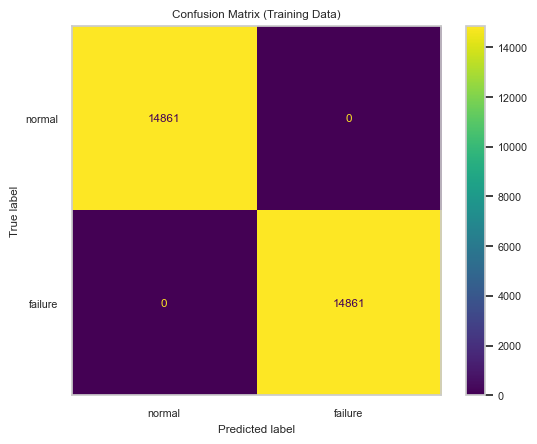

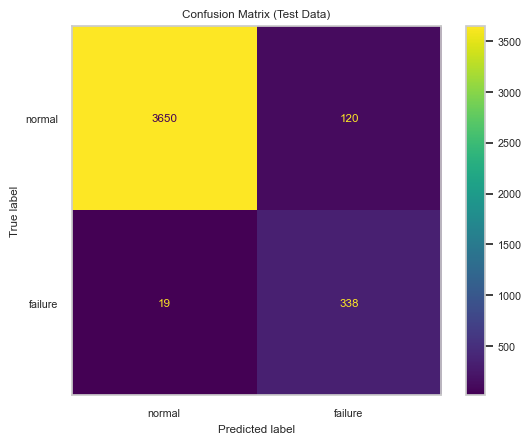

In [43]:
from sklearn import metrics
import matplotlib.pyplot as plt

# Predicting the train data using the best model (Random Forest)
y_predict_train = best_rf_model.predict(X_train)

# Display confusion matrix for the training data
matrix_train = metrics.confusion_matrix(y_train, y_predict_train)
matrix_display_train = metrics.ConfusionMatrixDisplay(confusion_matrix=matrix_train, display_labels=["normal", "failure"])
matrix_display_train.plot()
plt.title("Confusion Matrix (Training Data)")
plt.grid(False)
plt.show()

# Predicting the test data using the best model (Random Forest)
y_predict_test = best_rf_model.predict(X_test)

# Display confusion matrix for the test data
matrix_test = metrics.confusion_matrix(y_test, y_predict_test)
matrix_display_test = metrics.ConfusionMatrixDisplay(confusion_matrix=matrix_test, display_labels=["normal", "failure"])
matrix_display_test.plot()
plt.title("Confusion Matrix (Test Data)")
plt.grid(False)
plt.show()


In [44]:
from sklearn import metrics

# Classification report for the training data
report_train = metrics.classification_report(y_train, y_predict_train, target_names=["normal", "failure"])
print("Classification Report (Training Data):")
print(report_train)

# Classification report for the test data
report_test = metrics.classification_report(y_test, y_predict_test, target_names=["normal", "failure"])
print("Classification Report (Test Data):")
print(report_test)


Classification Report (Training Data):
              precision    recall  f1-score   support

      normal       1.00      1.00      1.00     14861
     failure       1.00      1.00      1.00     14861

    accuracy                           1.00     29722
   macro avg       1.00      1.00      1.00     29722
weighted avg       1.00      1.00      1.00     29722

Classification Report (Test Data):
              precision    recall  f1-score   support

      normal       0.99      0.97      0.98      3770
     failure       0.74      0.95      0.83       357

    accuracy                           0.97      4127
   macro avg       0.87      0.96      0.91      4127
weighted avg       0.97      0.97      0.97      4127



In [47]:
dump(grid_search_rf.best_estimator_.named_steps['scaler'], 'best_rf_scaler.joblib')

['best_rf_scaler.joblib']

In [48]:
dump(best_rf_model, 'best_rf_model.joblib')

['best_rf_model.joblib']